# Report project: ADAM Optimizer Notebook

This project was done in the scope of the CS-439 : Optimization for ML course. The project was done by :  
- Brioschi Riccardo 
- Mossinelli Giacomo
- Havolli Albias 

### Import useful libraries

In [8]:
# Import useful libraries for computation
import numpy as np

# Import torch and libraries to deal with NN
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Import usefil library to visualize results
import matplotlib.pyplot as plt

# Importing the LeNet5 architecture we are going to use for our study and comparisons
from cnn_architectures import *

# Importing parameters to use with different optimizers before comparing them
import params

# Importing useful functions
from helpers import *

# Ignoring warnings to make the code more readable
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Setting the parameters and additional variables

In [9]:
# Defininig neural network's parameters and seed for reproducibility purposes
RANDOM_SEED = 42
IMG_SIZE = 32
N_CLASSES = 10
# Checking device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

### Loading MNIST dataset, reshaping and plotting  data (ADAM)

In [10]:
# Loading data
transforms = transforms.Compose([transforms.Resize(IMG_SIZE),
                                 transforms.ToTensor()])

# Load the MNIST dataset
raw_mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
raw_mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms)

# Passing train data to the dataloader
train_loader = DataLoader(dataset=raw_mnist_trainset, 
                          batch_size=params.ADAM_BATCH_SIZE, 
                          shuffle=True)

# Passing test data to the dataloader
test_loader = DataLoader(dataset=raw_mnist_testset, 
                          batch_size=params.ADAM_BATCH_SIZE, 
                          shuffle=False)


## Loading CIFAR-10 Dataset

In [14]:
# Loading data
#transforms = transforms.Compose([transforms.Resize(IMG_SIZE),
                                 #transforms.ToTensor()])

# Load the MNIST dataset
raw_mnist_trainset = datasets.CIFAR10(root='./data', train=True, download=False, transform=transforms)
raw_mnist_testset = datasets.CIFAR10(root='./data', train=False, download=False, transform=transforms)

# Passing train data to the dataloader
train_loader = DataLoader(dataset=raw_mnist_trainset, 
                          batch_size=params.ADAM_BATCH_SIZE, 
                          shuffle=True)

# Passing test data to the dataloader
test_loader = DataLoader(dataset=raw_mnist_testset, 
                          batch_size=params.ADAM_BATCH_SIZE, 
                          shuffle=False)

In [11]:
# Reshaping train data (from 28*28 to 32*32) for visualization purposes
train_data, train_target = reshape_train_data(raw_mnist_trainset, DEVICE)
# Reshaping test data (from 28*28 to 32*32) for visualization purposes
test_data, test_target = reshape_test_data(raw_mnist_trainset, DEVICE)

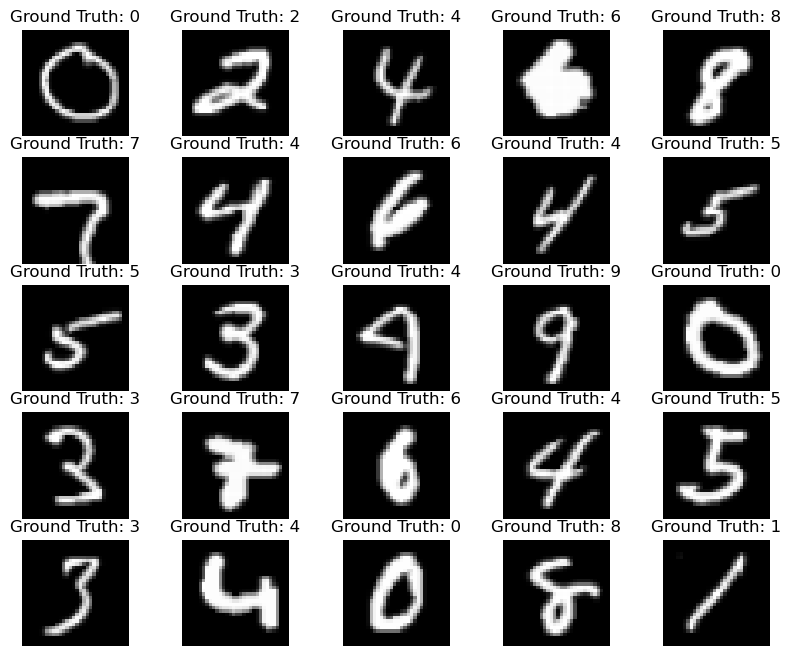

In [12]:
#plot some training examples with ground truth 
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_loader), size=(1,)).item()
    img = train_data[sample_idx]
    label = train_target[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title("Ground Truth: {}".format(train_target[sample_idx]))
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Model training and Model Evaluation using ADAM

First, we train our model using LeNet5. The model was trained using batches of size 32 and 15 epochs. Despite the low number of training episodes and iterations, the model seems to perform well.

In [13]:
# Initializing the model we are going to use in our study
model = LeNet5(num_classes=N_CLASSES)
# Defining the criterion (loss function) to be used during the training procedure
criterion = nn.CrossEntropyLoss()
# Defining and initializing the optimizer (ADAM in this notebook)
optimizer = torch.optim.Adam(model.parameters(), lr=params.ADAM_LEARNING_RATE)

Let's train and test our first model

In [14]:
model, optimizer, _ = training_loop(model, criterion, optimizer, train_loader, test_loader, params.ADAM_N_EPOCHS,
                                    DEVICE)

16:28:40 --- Epoch: 0	Train loss: 0.2360	Valid loss: 0.0986	Train accuracy: 97.07	Valid accuracy: 96.82
16:29:03 --- Epoch: 1	Train loss: 0.0825	Valid loss: 0.0633	Train accuracy: 98.28	Valid accuracy: 98.00
16:29:25 --- Epoch: 2	Train loss: 0.0577	Valid loss: 0.0509	Train accuracy: 98.91	Valid accuracy: 98.43
16:29:48 --- Epoch: 3	Train loss: 0.0438	Valid loss: 0.0545	Train accuracy: 98.79	Valid accuracy: 98.32
16:30:10 --- Epoch: 4	Train loss: 0.0366	Valid loss: 0.0540	Train accuracy: 99.06	Valid accuracy: 98.19
16:30:33 --- Epoch: 5	Train loss: 0.0313	Valid loss: 0.0533	Train accuracy: 99.19	Valid accuracy: 98.40
16:30:55 --- Epoch: 6	Train loss: 0.0270	Valid loss: 0.0438	Train accuracy: 99.42	Valid accuracy: 98.51
16:31:18 --- Epoch: 7	Train loss: 0.0240	Valid loss: 0.0427	Train accuracy: 99.50	Valid accuracy: 98.62
16:31:40 --- Epoch: 8	Train loss: 0.0216	Valid loss: 0.0455	Train accuracy: 99.48	Valid accuracy: 98.57
16:32:02 --- Epoch: 9	Train loss: 0.0187	Valid loss: 0.0522	Trai